# SPAM EMAIL CLASSIFICATION USING KNN

Importing all required modules and libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline

Loading the dataset

In [27]:
data = pd.read_csv('emails.csv')

In [28]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Train Test split

In [4]:
X = data['Message']
y = data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Preprocessing the test data

In [5]:
import re
import string

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NANDITHAPRABU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NANDITHAPRABU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NANDITHAPRABU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#function to convert the text to lower case
def convert_to_lower(text):
    return text.lower()

In [7]:
#function to remove numbers present
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [8]:
#finds base form of a word
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)
  # Tokenization is the process of splitting a text into individual words or tokens. This step breaks the input text into a list of words.

In [9]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [10]:
# Stopwords are words that are commonly used in a language but typically do not carry much information by themselves (e.g., "and," "the," "is"). Removing stopwords is a common preprocessing step in natural language processing (NLP) to reduce noise and focus on more meaningful words.
def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

In [11]:
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

Applying the functions to training set 

In [12]:
X_train = X_train.apply(lambda x: convert_to_lower(x))
X_train.head()

708     quite late lar... ard 12 anyway i wun b drivin...
4338                        on a tuesday night r u 4 real
5029    go chase after her and run her over while she'...
4921     g says you never answer your texts, confirm/deny
2592         still work going on:)it is very small house.
Name: Message, dtype: object

In [13]:
X_train = X_train.apply(lambda x: remove_numbers(x))
X_train.head()

708      quite late lar... ard   anyway i wun b drivin...
4338                        on a tuesday night r u   real
5029    go chase after her and run her over while she'...
4921     g says you never answer your texts, confirm/deny
2592         still work going on:)it is very small house.
Name: Message, dtype: object

In [14]:
X_train = X_train.apply(lambda x: remove_punctuation(x))
X_train.head()

708            quite late lar ard   anyway i wun b drivin
4338                        on a tuesday night r u   real
5029    go chase after her and run her over while shes...
4921       g says you never answer your texts confirmdeny
2592            still work going onit is very small house
Name: Message, dtype: object

In [15]:
X_train = X_train.apply(lambda x: remove_stopwords(x))
X_train.head()

708     quite late lar ard anyway wun b drivin
4338                    tuesday night r u real
5029         go chase run shes crossing street
4921     g says never answer texts confirmdeny
2592         still work going onit small house
Name: Message, dtype: object

In [16]:
X_train = X_train.apply(lambda x: remove_extra_white_spaces(x))
X_train.head()

708      quite late lar ard anyway wun drivin
4338                     tuesday night u real
5029        go chase run shes crossing street
4921    g says never answer texts confirmdeny
2592        still work going onit small house
Name: Message, dtype: object

In [17]:
X_train = X_train.apply(lambda x: lemmatizing(x))
X_train.head()

708     quite late lar ard anyway wun drivin
4338                    tuesday night u real
5029       go chase run shes crossing street
4921     g say never answer text confirmdeny
2592       still work going onit small house
Name: Message, dtype: object

Applying the functions to the testing set

In [29]:
X_test = X_test.apply(lambda x: convert_to_lower(x))
X_test = X_test.apply(lambda x: remove_numbers(x))
X_test = X_test.apply(lambda x: remove_punctuation(x))
X_test = X_test.apply(lambda x: remove_stopwords(x))
X_test = X_test.apply(lambda x: remove_extra_white_spaces(x))
X_test = X_test.apply(lambda x: lemmatizing(x))

Feature Extraction:

Using TF-IDF or Count Vectorization to convert the text data into feature vectors. This step is crucial as KNN requires numerical data.

In [30]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_train_tfidf

<3900x6531 sparse matrix of type '<class 'numpy.float64'>'
	with 32195 stored elements in Compressed Sparse Row format>

In [35]:
y_train.value_counts()

ham     3377
spam     523
Name: Category, dtype: int64

We can see that the dataset is imbalanced. To balance it we are using oversampling method only for training data.

In [31]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_tfidf, y_train)

Training the model with k=3 and euclidean distance metric

In [51]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Predicting it for test data

In [52]:
y_pred = knn_classifier.predict(X_test_tfidf)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1448
        spam       0.98      0.64      0.77       224

    accuracy                           0.95      1672
   macro avg       0.96      0.82      0.87      1672
weighted avg       0.95      0.95      0.95      1672



Training the model with k=3 and cosine similarity metric

In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='cosine')
knn_classifier.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='cosine', n_neighbors=3)

In [57]:
y_pred = knn_classifier.predict(X_test_tfidf)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1448
        spam       0.91      0.88      0.90       224

    accuracy                           0.97      1672
   macro avg       0.95      0.94      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [60]:
y_pred = pd.DataFrame(y_pred)
hams, spams = y_pred.value_counts()
hams, spams

(1454, 218)

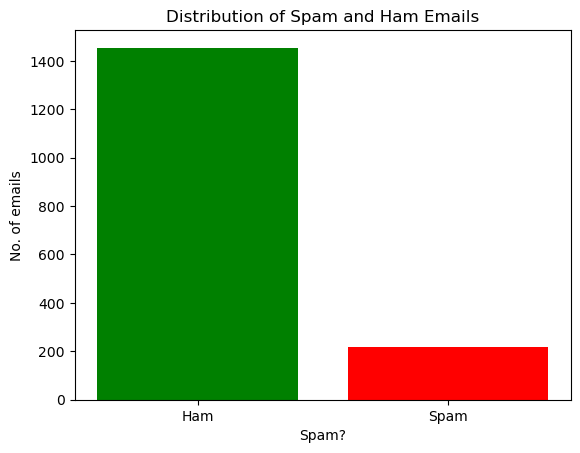

In [64]:
plt.bar(['Ham', 'Spam'], [hams, spams], color=['green', 'red'])
plt.xlabel('Spam?')
plt.ylabel('No. of emails')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

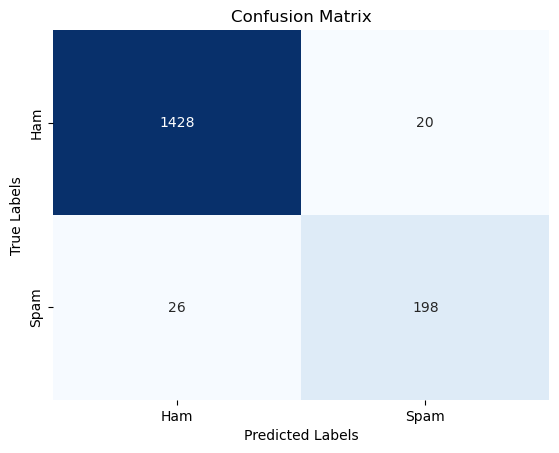

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2) + 0.5, ['Ham', 'Spam'])
plt.yticks(np.arange(2) + 0.5, ['Ham', 'Spam'])
plt.show()